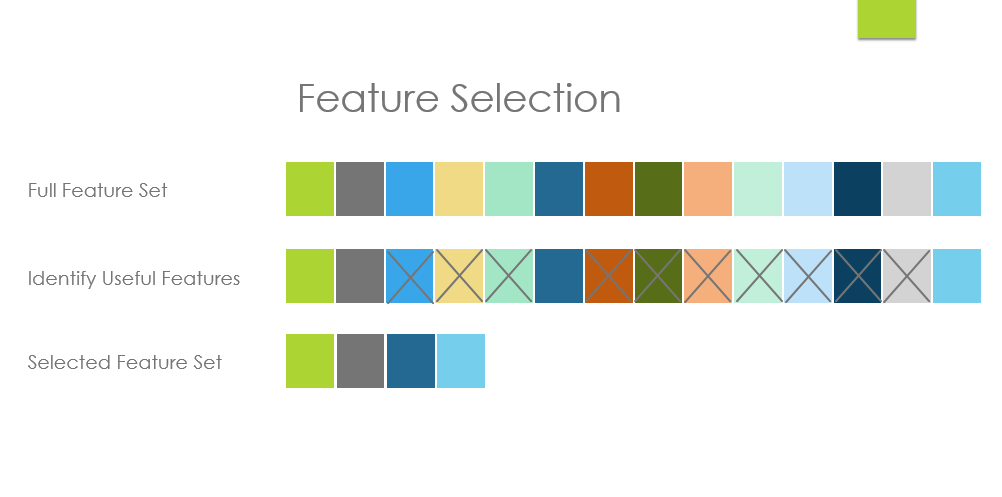
#### Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model.
#### Benefits of performing feature selection before modeling
#####  1. Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
#####  2. Improves Accuracy: Less misleading data means modeling accuracy improves.
#####  3. Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
df = pd.read_csv('../input/mobile-price-classification/train.csv')
df.head()

## 1.Univariate Selection
#### Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
bestfeature = SelectKBest(score_func=chi2, k=10)
bf = bestfeature.fit(X,y)

In [ ]:
score = pd.DataFrame(bf.scores_)
colnames = pd.DataFrame(X.columns)
bf_result = pd.concat([colnames, score], axis='columns')
bf_result.columns = ['Feature','Score']
bf_result.nlargest(10,'Score')

## 2.Feature Importance
#### You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X,y)

In [ ]:
rf.feature_importances_

In [ ]:
rf_feature = pd.Series(rf.feature_importances_, index=X.columns)
rf_feature.nlargest(10).plot(kind='barh')

## 3.Correlation Matrix with Heatmap
#### Correlation states how the features are related to each other or the target variable.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cor_matrix = df.corr()

In [ ]:
top_corr_feature = cor_matrix.index

In [ ]:
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn')